# Car Price Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and processing

In [26]:
file =pd.read_csv(r"C:\Users\ms900\OneDrive\Desktop\car data.csv")
print(file.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [28]:
frame =pd.DataFrame(file)
frame.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
frame.shape

(301, 9)

### getting dome information about the dataset

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
## checking no of missin gvalues
frame.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(frame)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [8]:
print(frame.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(frame.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
print(frame.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Encoding the Categorical values

In [30]:
# encoding the Fuel_Type,Seller_Type,Transmission
# replce the values
frame.replace({"Fuel_Type":{"Petrol":0 ,"Diesel" :1,"CNG":2}},inplace=True)
frame.replace({"Seller_Type" : {"Dealer":0,"Individual":1}},inplace = True)
frame.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [12]:
print(frame)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0   

### split the data for train and test method

In [31]:
x = frame.drop(["Car_Name","Selling_Price"],axis=1)
y = frame["Selling_Price"]
x.head(10)
y.head(10)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
5    9.25
6    6.75
7    6.50
8    8.75
9    7.45
Name: Selling_Price, dtype: float64

#### spliting the data and target

In [14]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1,random_state = 2) 

In [15]:
print(y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [16]:
print(x_test)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0    

## LinearRegression Model

In [17]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

### Model Evalution

In [18]:
# prediction on training data
y_pre = model.predict(x_train)

In [19]:
# R squared error
sq_error = metrics.r2_score(y_train,y_pre)
print("R sq_Error :",sq_error)

R sq_Error : 0.8799451660493716


## Visualize acutal price and predicting price

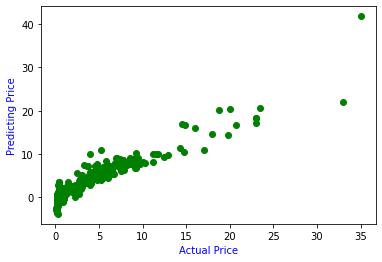

In [20]:
plt.scatter(y_train,y_pre,color="green")
plt.plot(color='blue')
plt.xlabel("Actual Price",color="blue")
plt.ylabel("Predicting Price",color="blue")
plt.show()

In [21]:
# test data prediction
y_pre_test = model.predict(x_test)

In [22]:
sq_error = metrics.r2_score(y_test,y_pre_test)
print(sq_error)

0.836576671502587


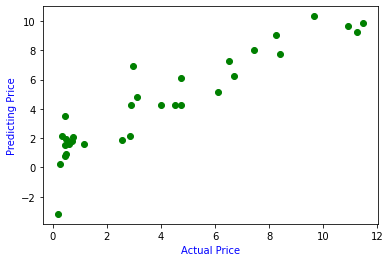

In [23]:
plt.scatter(y_test,y_pre_test,color="green")
plt.plot(color='green')
plt.xlabel("Actual Price",color="blue")
plt.ylabel("Predicting Price",color="blue")
plt.show()